C:\Users\nicol\AppData\Local\Temp\ipykernel_28364\2406139507.py:78: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_positive_cells) \


date,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,5.912465,1.306557,-8.030593,-2.520135,-8.335553,-10.489510,-3.094463,1.649276,2.877936,-4.153252,-1.578240,3.343569,-3.894389,-2.780639,-0.847757,3.349964,11.758621,5.766266,-1.807580,14.900564,4.187128,3.126551,5.099832,2.975509,-8.733333,-1.072125,-11.015278,13.657727,-1.388212,5.207305,-4.880338
2019,-1.884921,-4.120324,-0.474558,-1.642819,1.347346,1.837061,0.496992,0.754619,-3.848140,-2.285561,0.908841,-0.409277,2.027953,-2.686728,0.745445,-6.417992,-7.151231,8.559697,-3.870780,2.664245,-2.537622,4.058147,-3.664921,2.480339,-1.506647,2.367396,-3.660322,2.186456,1.396731,-1.992966,-1.734969
2020,-9.560063,1.870901,3.516192,-9.844465,8.214358,-0.768942,-2.985827,-8.317642,4.809804,-4.109219,-1.846631,3.669132,6.697140,3.070631,-3.124016,9.288268,-2.796620,0.997613,-0.418131,-1.339748,-5.668066,2.401990,-12.847555,12.273494,2.979418,0.482142,-2.348633,13.965216,8.150879,-3.565997,-1.386699
2021,-0.321958,11.118293,-9.534884,-8.798972,-2.889359,3.047896,-2.957746,1.306241,-7.664756,-5.978261,11.808423,-0.590842,-9.070632,3.515944,3.472770,-5.415713,-1.774194,1.970443,0.080515,-0.562701,3.392569,3.752932,11.152977,-5.627119,4.235463,0.137646,4.192440,-7.651715,-4.857143,1.950488,-3.752759
2022,-1.286880,1.494911,0.125313,0.782228,-0.900062,-0.313185,-2.544769,1.353529,-0.826972,0.224431,-1.663468,-0.130166,2.378625,-2.005092,-2.500000,-12.354312,1.481200,-0.486527,-4.924812,2.293397,-2.010828,1.262826,1.051811,-0.077101,0.000000,2.393822,-1.884659,-4.648483,-1.731776,0.737705,0.040700
2023,2.234043,3.433923,-0.679074,3.039514,4.620300,4.015970,2.798465,19.736553,6.159487,2.711103,-7.398688,5.029962,15.404564,-3.654336,-6.668739,1.232512,-4.508062,3.720930,-4.302326,2.326389,7.771933,-1.983627,-1.526104,-3.442088,5.457003,-2.451923,4.057828,-2.778655,-1.217928,-1.167379,-1.164725
2024,6.543095,4.566409,-0.898353,-0.369282,3.967652,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Positive Count,3.000000,6.000000,2.000000,2.000000,4.000000,3.000000,2.000000,5.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,3.000000,2.000000,5.000000,1.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,1.000000
Mean,0.233683,2.810096,-2.282280,-2.764848,0.860669,-0.445119,-1.381225,2.747096,0.251226,-2.265126,0.038373,1.818730,2.257210,-0.756703,-1.487050,-1.719546,-0.498381,3.421404,-2.540519,3.380358,0.855852,2.103136,-0.122327,1.430506,0.405317,0.309493,-1.776437,2.455091,0.058759,0.194859,-2.146465


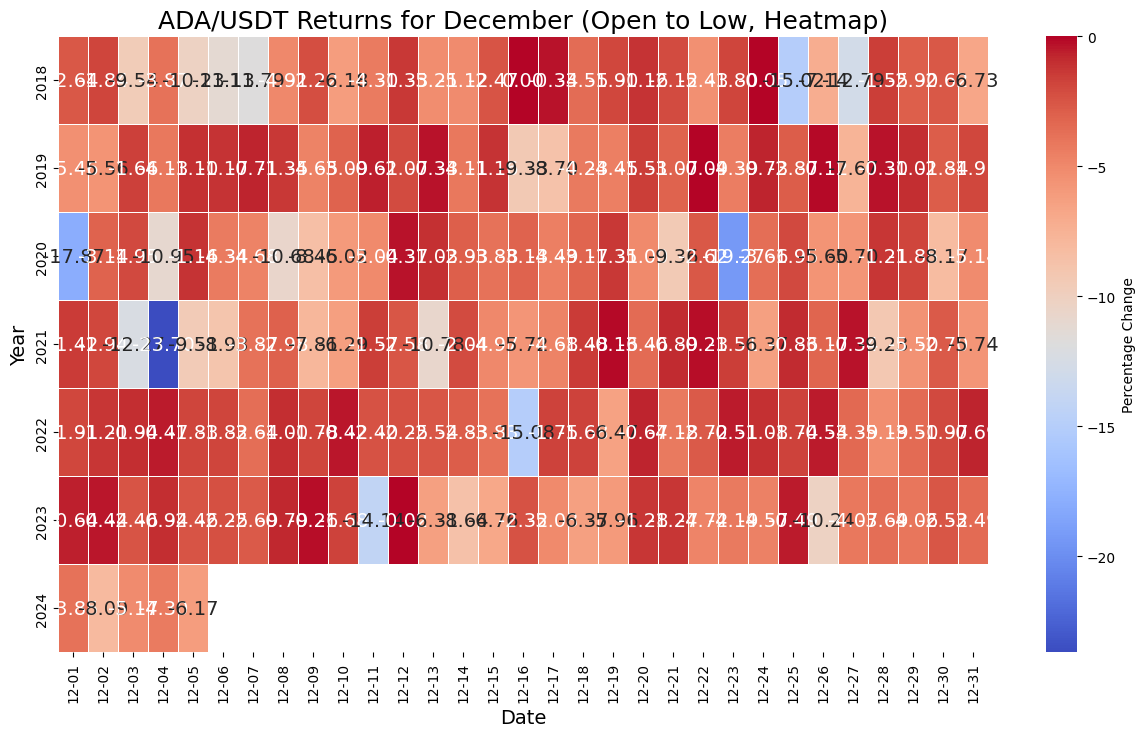

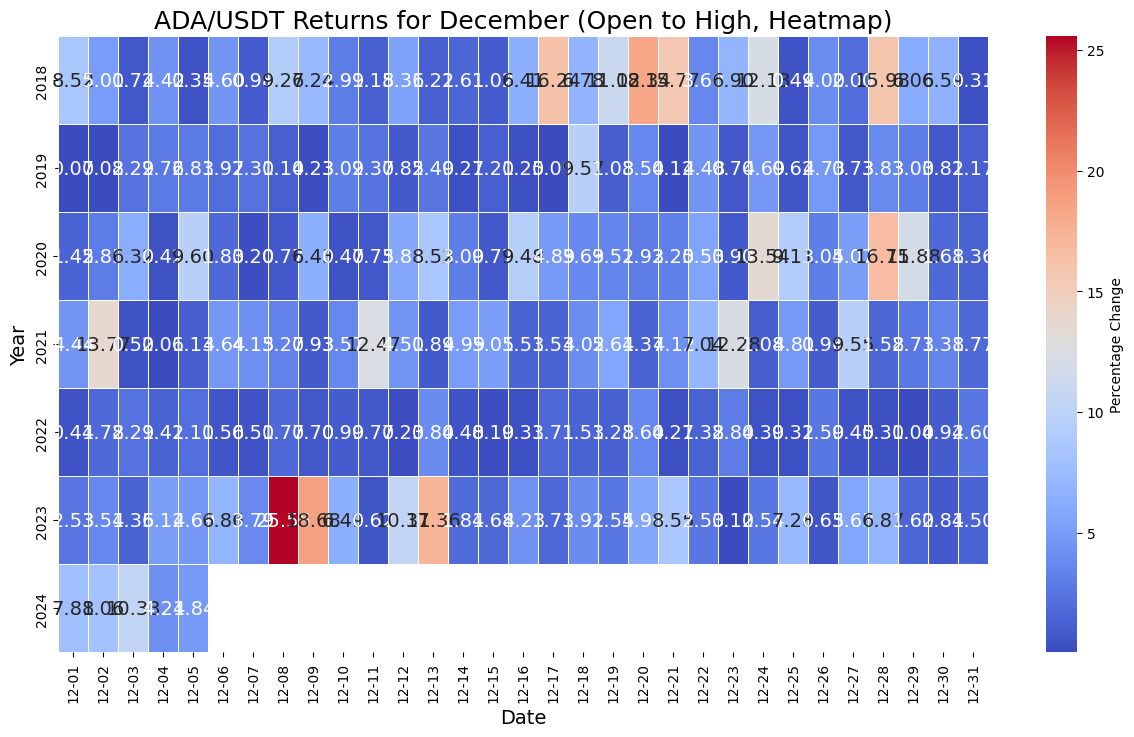

In [15]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year for the pivot table
    df['year'] = df.index.year
    df['date'] = df.index.strftime('%m-%d')  # Format dates as MM-DD for columns
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to calculate open to low return
def calculate_open_to_low(df):
    df['open_to_low'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate open to high return
def calculate_open_to_high(df):
    df['open_to_high'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to create and style the pivot table
def create_pivot_table_with_stats(df, value_column):
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='year', columns='date', aggfunc='mean')

    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)

    # Calculate the number of positive values for each column (excluding Mean and Median rows)
    positive_count = (pivot_table > 0).sum(axis=0)  # Count positive values

    # Add the positive count row before Mean and Median rows
    pivot_table.loc['Positive Count'] = positive_count
    pivot_table.loc['Mean'] = avg_value
    pivot_table.loc['Median'] = median_value

    # Style the table
    def style_positive_cells(val):
        color = 'background-color: green' if val > 0 else ''
        return color

    styled_table = pivot_table.style \
        .applymap(style_positive_cells) \
        .set_table_styles([
            {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},
            {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},
            {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
            {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
            {'selector': 'th', 'props': [('padding', '8px')]},
            {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
            {'selector': 'tbody tr', 'props': [('color', 'blue')]},
        ]) \
        .set_table_attributes('class="dataframe"')

    return styled_table

# Function to display a styled table with a title
def display_table(title, styled_table):
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Function to display a heatmap
def display_heatmap(title, df):
    plt.figure(figsize=(15, 8))  # Increase the figure size for larger cells
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
                annot_kws={'size': 14},  # Increase the font size of the numbers
                cbar_kws={'label': 'Percentage Change'})  # Add label to the colorbar
    plt.title(title, fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Year', fontsize=14)
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ADA/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Create and display the Open to Close pivot table (no heatmap)
    styled_table_open_to_close = create_pivot_table_with_stats(eth_data, 'daily_return')
    display_table("ADA/USDT Daily Returns for December (Open to Close, with Mean, Median, and Positive Count)", styled_table_open_to_close)

    # Calculate Open to Low return
    eth_data = calculate_open_to_low(eth_data)

    # Create the pivot table for Open to Low
    open_to_low_pivot = eth_data.pivot_table(values='open_to_low', index='year', columns='date', aggfunc='mean')

    # Display the heatmap for Open to Low
    display_heatmap("ADA/USDT Returns for December (Open to Low, Heatmap)", open_to_low_pivot)

    # Calculate Open to High return
    eth_data = calculate_open_to_high(eth_data)

    # Create the pivot table for Open to High
    open_to_high_pivot = eth_data.pivot_table(values='open_to_high', index='year', columns='date', aggfunc='mean')

    # Display the heatmap for Open to High
    display_heatmap("ADA/USDT Returns for December (Open to High, Heatmap)", open_to_high_pivot)

# Run the main function
main_december()


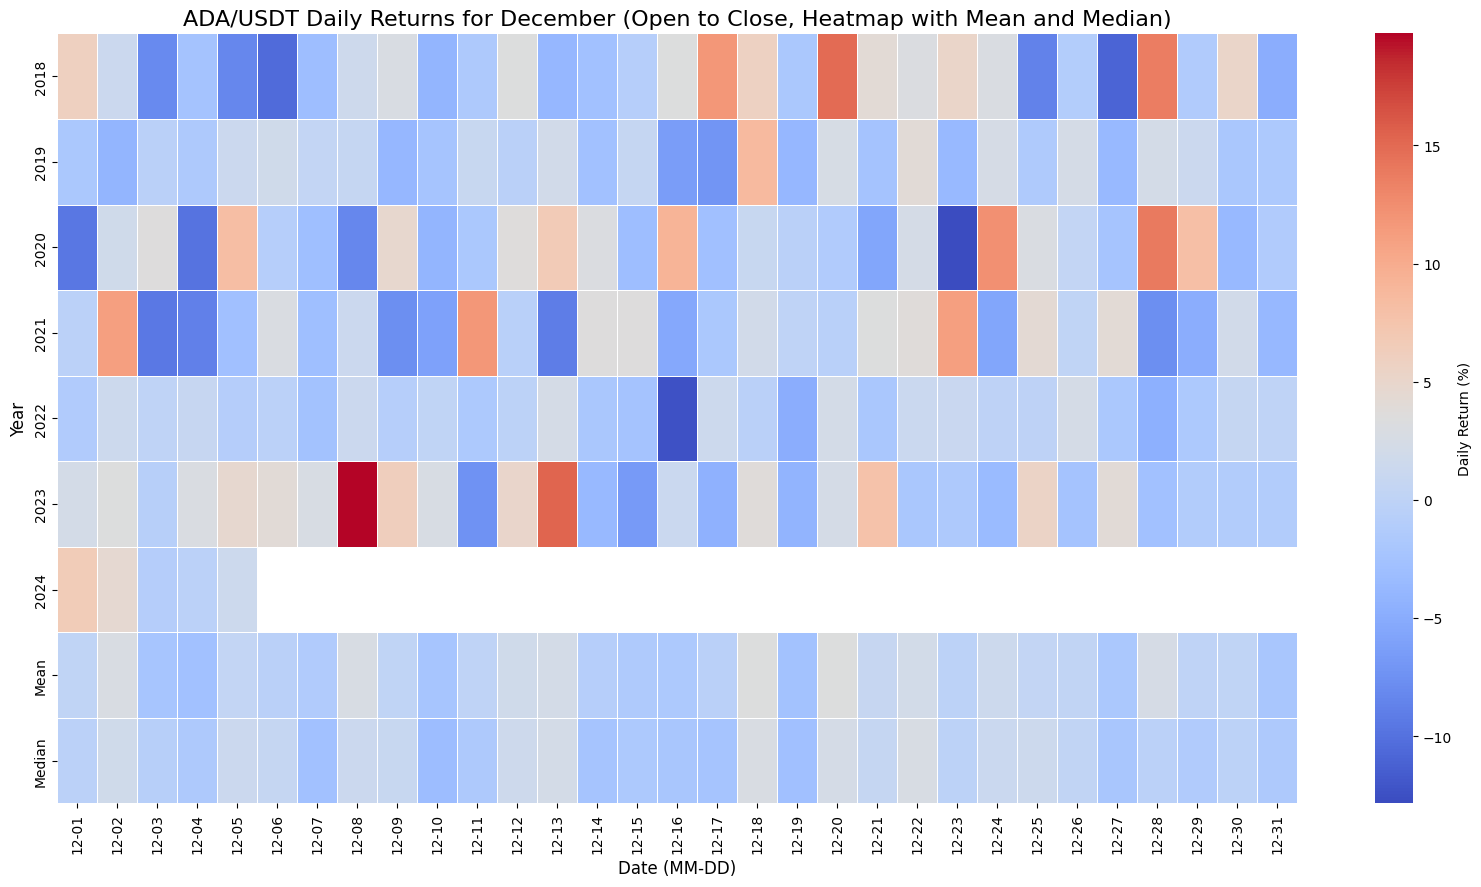

In [5]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year for the pivot table
    df['year'] = df.index.year
    df['date'] = df.index.strftime('%m-%d')  # Format dates as MM-DD for columns
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to create and display a heatmap
def create_heatmap_with_stats(df, value_column):
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='year', columns='date', aggfunc='mean')

    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)

    # Add mean and median as rows
    pivot_table.loc['Mean'] = avg_value
    pivot_table.loc['Median'] = median_value

    # Create the heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot_table, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Daily Return (%)'})
    plt.title("ADA/USDT Daily Returns for December (Open to Close, Heatmap with Mean and Median)", fontsize=16)
    plt.xlabel("Date (MM-DD)", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ADA/USDT'
    ADA_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    ADA_data = calculate_daily_return(ADA_data)

    # Create and display the heatmap
    create_heatmap_with_stats(ADA_data, 'daily_return')

# Run the main function
main_december()


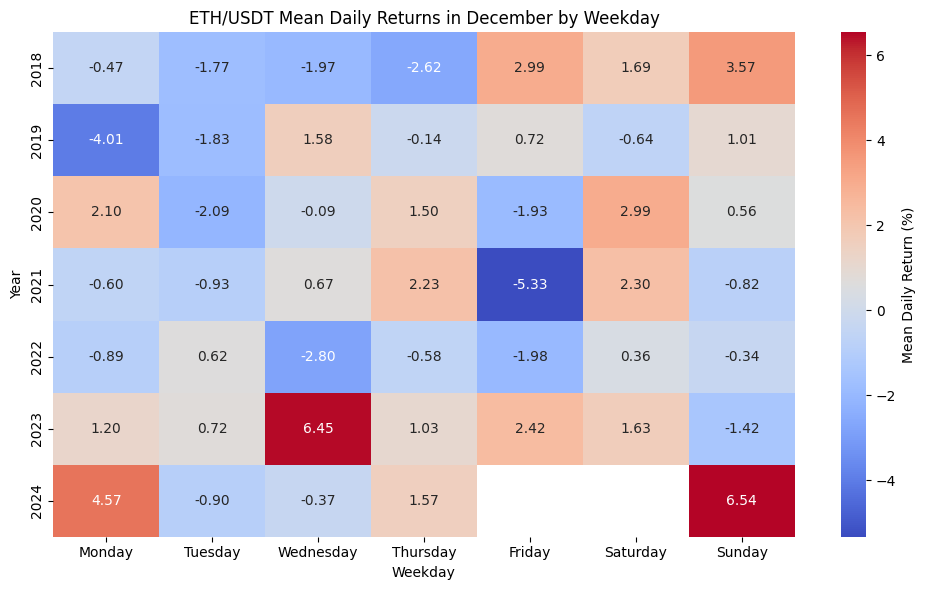

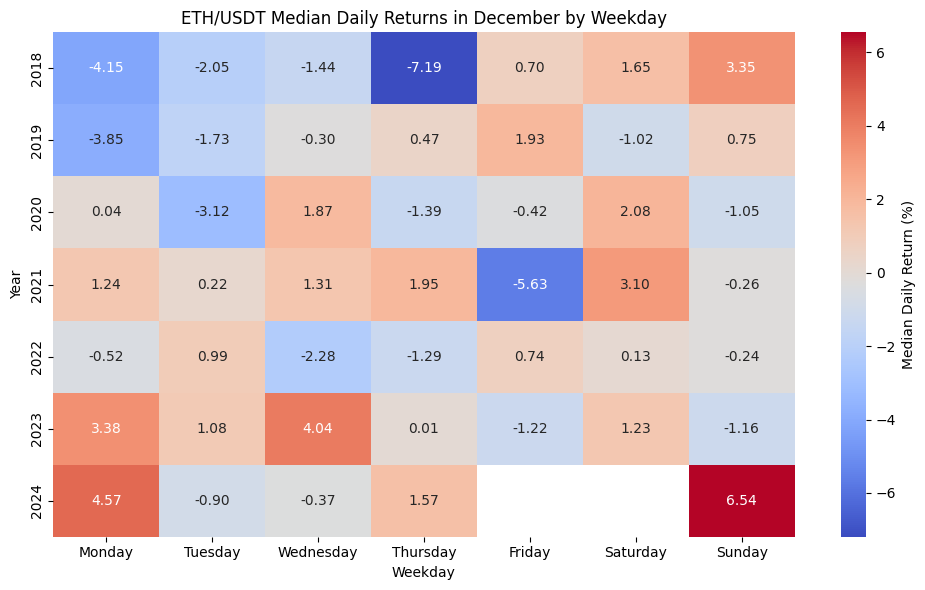

In [4]:
import ccxt
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    
    # Use strftime('%A') to get the full English name of the weekday (e.g., 'Monday')
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)
    
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to create a heatmap based on weekdays and years
def create_heatmap(df, value_column, aggregation, title):
    # Create a pivot table with years as rows and weekdays as columns
    heatmap_data = df.pivot_table(values=value_column, index='year', columns='weekday', aggfunc=aggregation)

    # Reorder columns to align with the traditional week order (Monday to Sunday)
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data[week_order]

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': f'{aggregation.title()} Daily Return (%)'})
    plt.title(title)
    plt.xlabel("Weekday")
    plt.ylabel("Year")
    plt.tight_layout()
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ADA/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Create and display the heatmaps
    create_heatmap(eth_data, 'daily_return', 'mean', "ETH/USDT Mean Daily Returns in December by Weekday")
    create_heatmap(eth_data, 'daily_return', 'median', "ETH/USDT Median Daily Returns in December by Weekday")

# Run the main function
main_december()


In [6]:
import ccxt
import pandas as pd
from IPython.display import display

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)
    
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to highlight positive values with green
def highlight_positive(val):
    return 'background-color: green' if val > 0 else ''  # Green for positive, no highlight for non-positive

# Function to display the data with highlights
def display_with_highlights(df):
    # Create pivot tables for mean and median
    mean_df = df.pivot_table(values='daily_return', index='year', columns='weekday', aggfunc='mean')
    median_df = df.pivot_table(values='daily_return', index='year', columns='weekday', aggfunc='median')

    # Reorder columns to match traditional weekday order (Monday to Sunday)
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    mean_df = mean_df[week_order]
    median_df = median_df[week_order]

    # Apply the highlight function to both tables
    styled_mean_df = mean_df.style.applymap(highlight_positive)
    styled_median_df = median_df.style.applymap(highlight_positive)

    # Display both styled DataFrames
    print("Mean Daily Returns:")
    display(styled_mean_df)
    
    print("Median Daily Returns:")
    display(styled_median_df)

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ADA/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the DataFrame with highlights
    display_with_highlights(eth_data)

# Run the main function
main_december()


Mean Daily Returns:


C:\Users\nicol\AppData\Local\Temp\ipykernel_28364\3656825931.py:60: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_mean_df = mean_df.style.applymap(highlight_positive)
C:\Users\nicol\AppData\Local\Temp\ipykernel_28364\3656825931.py:61: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_median_df = median_df.style.applymap(highlight_positive)


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2018,-0.466010,-1.766361,-1.967922,-2.624654,2.992439,1.690465,3.568319
2019,-4.008869,-1.833196,1.579768,-0.141329,0.717234,-0.635225,1.014004
2020,2.095489,-2.089770,-0.088916,1.499430,-1.928516,2.986875,0.559954
2021,-0.598249,-0.925237,0.670569,2.228258,-5.333443,2.303839,-0.815510
2022,-0.890304,0.618544,-2.802293,-0.580460,-1.979371,0.358909,-0.341942
2023,1.204690,0.724003,6.451188,1.034352,2.420060,1.626488,-1.416569
2024,4.566409,-0.898353,-0.369282,2.442928,nan,nan,6.543095


Median Daily Returns:


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2018,-4.153252,-2.049188,-1.439852,-7.191950,0.703245,1.649276,3.349964
2019,-3.848140,-1.734969,-0.298903,0.469034,1.932507,-1.020315,0.754619
2020,0.042402,-3.124016,1.870901,-1.386699,-0.424509,2.075637,-1.054345
2021,1.242597,0.217411,1.306241,1.950488,-5.627119,3.102953,-0.255163
2022,-0.515114,0.990106,-2.277798,-1.286880,0.737705,0.125313,-0.243263
2023,3.380222,1.084188,4.036899,0.009905,-1.217928,1.232512,-1.164725
2024,4.566409,-0.898353,-0.369282,2.442928,nan,nan,6.543095


In [7]:
# Function to calculate the mean and median of daily returns for each weekday across all years
def calculate_weekday_stats(df):
    weekday_stats = df.groupby('weekday')['daily_return'].agg(['mean', 'median'])
    return weekday_stats

# Function to calculate and display the mean and median for each weekday
def display_weekday_statistics(df):
    weekday_stats = calculate_weekday_stats(df)
    
    # Print the mean and median for each weekday
    print("\nMean and Median of Daily Returns by Weekday (All Years Combined):")
    print(weekday_stats)

# Main function to fetch data, process it, and display the results
def main_december_statistics():
    # Fetch data
    symbol = 'ADA/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the mean and median statistics for each weekday
    display_weekday_statistics(eth_data)

# Run the function to get the statistics
main_december_statistics()



Mean and Median of Daily Returns by Weekday (All Years Combined):
               mean    median
weekday                      
Friday    -0.642191 -1.217928
Monday    -0.391166 -0.900062
Saturday   1.370417  0.496992
Sunday     0.713638  0.109081
Thursday   0.404584 -0.848079
Tuesday   -0.959607 -1.578240
Wednesday  0.577109 -0.321958


Daily Returns by Year and Weekday:


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,mean,median
year_week,,,,,,,,,
2018Week1,-4.880338,NaN,NaN,NaN,NaN,NaN,NaN,-4.880338,-4.880338
2018Week48,NaN,NaN,NaN,NaN,NaN,5.912465,1.306557,3.609511,3.609511
2018Week49,-8.030593,-2.520135,-8.335553,-10.489510,-3.094463,1.649276,2.877936,-3.991863,-3.543163
2018Week50,-4.153252,-1.578240,3.343569,-3.894389,-2.780639,-0.847757,3.349964,-0.937249,-1.257745
2018Week51,11.758621,5.766266,-1.807580,14.900564,4.187128,3.126551,5.099832,6.147340,5.433049
2018Week52,2.975509,-8.733333,-1.072125,-11.015278,13.657727,-1.388212,5.207305,-0.052630,-0.562377
2019Week1,-1.992966,-1.734969,NaN,NaN,NaN,NaN,NaN,-1.863967,-1.863967
2019Week48,NaN,NaN,NaN,NaN,NaN,NaN,-1.884921,-1.884921,-1.884921
2019Week49,-4.120324,-0.474558,-1.642819,1.347346,1.837061,0.496992,0.754619,-0.257383,0.119804


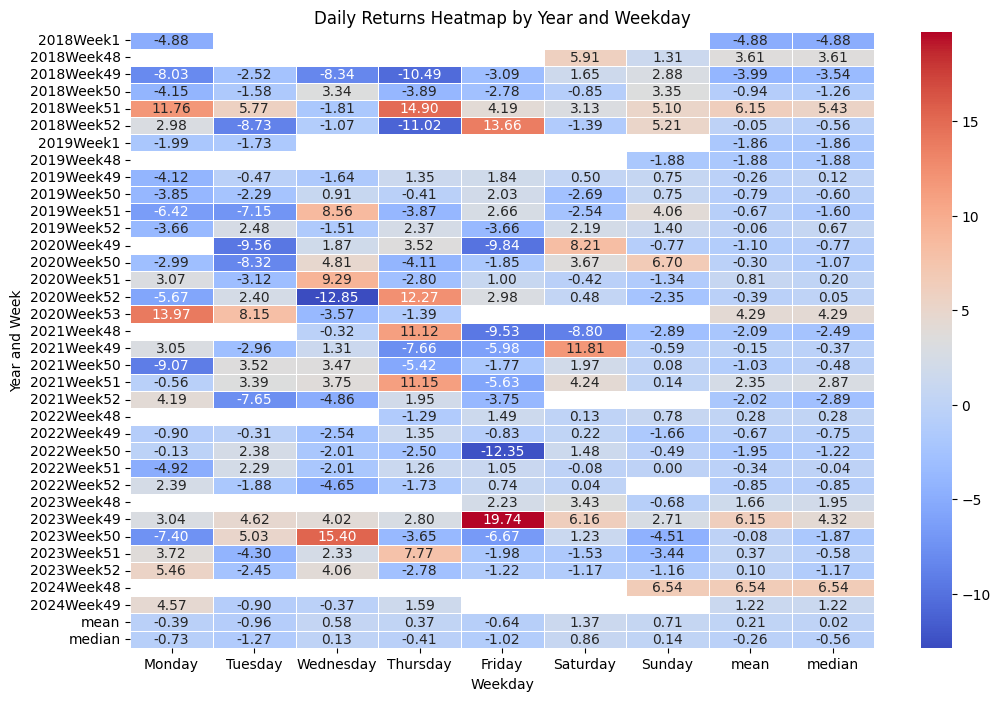

In [8]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)

        # Break if no data is returned
        if not ohlcv:
            break

        # Append the data
        all_data.extend(ohlcv)

        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)

    # Add a 'week' column for grouping
    df['week'] = df.index.isocalendar().week
    df['year_week'] = df['year'].astype(str) + 'Week' + df['week'].astype(str)

    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to display the data with weekdays as columns
def display_with_highlights(df):
    # Ensure weekdays are in traditional order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['weekday'] = pd.Categorical(df['weekday'], categories=week_order, ordered=True)

    # Sort data by year_week and weekday
    df = df.sort_values(by=['year_week', 'weekday'])

    # Create a pivot table with 'year_week' as the index and 'weekday' as the columns
    df_pivot = df.pivot_table(index='year_week', columns='weekday', values='daily_return', aggfunc='first')

    # Calculate mean and median for rows and columns
    df_pivot['mean'] = df_pivot.mean(axis=1)  # Row-wise mean
    df_pivot['median'] = df_pivot.median(axis=1)  # Row-wise median

    # Add mean and median for columns
    df_pivot.loc['mean'] = df_pivot.mean()  # Column-wise mean
    df_pivot.loc['median'] = df_pivot.median()  # Column-wise median

    # Display the result
    print("Daily Returns by Year and Weekday:")
    display(df_pivot)
    
    # Now generate a heatmap from the pivot table
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    plt.title("Daily Returns Heatmap by Year and Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Year and Week")
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ADA/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the DataFrame with highlights and the heatmap
    display_with_highlights(eth_data)

# Run the main function
main_december()


Daily Returns by Year and Weekday:


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,mean,median
year_week,,,,,,,,,
2018Week1,-4.880338,NaN,NaN,NaN,NaN,NaN,NaN,-4.880338,-4.880338
2018Week48,NaN,NaN,NaN,NaN,NaN,5.912465,1.306557,3.609511,3.609511
2018Week49,-8.030593,-2.520135,-8.335553,-10.489510,-3.094463,1.649276,2.877936,-3.991863,-3.543163
2018Week50,-4.153252,-1.578240,3.343569,-3.894389,-2.780639,-0.847757,3.349964,-0.937249,-1.257745
2018Week51,11.758621,5.766266,-1.807580,14.900564,4.187128,3.126551,5.099832,6.147340,5.433049
2018Week52,2.975509,-8.733333,-1.072125,-11.015278,13.657727,-1.388212,5.207305,-0.052630,-0.562377
2019Week1,-1.992966,-1.734969,NaN,NaN,NaN,NaN,NaN,-1.863967,-1.863967
2019Week48,NaN,NaN,NaN,NaN,NaN,NaN,-1.884921,-1.884921,-1.884921
2019Week49,-4.120324,-0.474558,-1.642819,1.347346,1.837061,0.496992,0.754619,-0.257383,0.119804


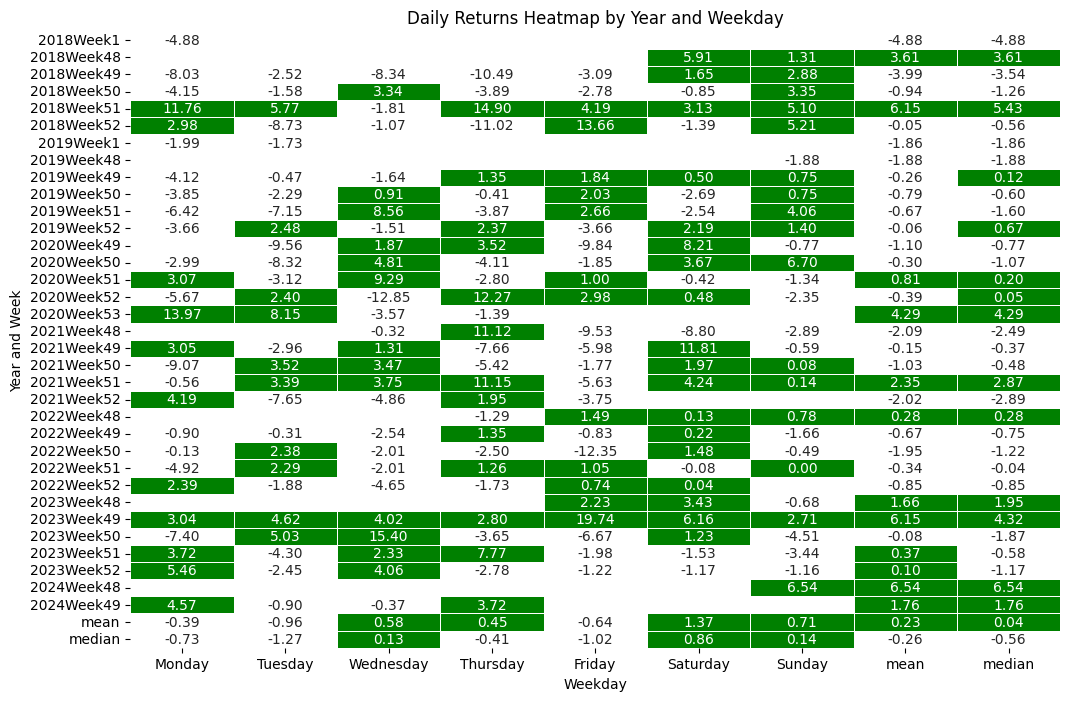

In [9]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.colors as mcolors

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)

        # Break if no data is returned
        if not ohlcv:
            break

        # Append the data
        all_data.extend(ohlcv)

        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)

    # Add a 'week' column for grouping
    df['week'] = df.index.isocalendar().week
    df['year_week'] = df['year'].astype(str) + 'Week' + df['week'].astype(str)

    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to display the data with weekdays as columns
def display_with_highlights(df):
    # Ensure weekdays are in traditional order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['weekday'] = pd.Categorical(df['weekday'], categories=week_order, ordered=True)

    # Sort data by year_week and weekday
    df = df.sort_values(by=['year_week', 'weekday'])

    # Create a pivot table with 'year_week' as the index and 'weekday' as the columns
    df_pivot = df.pivot_table(index='year_week', columns='weekday', values='daily_return', aggfunc='first')

    # Calculate mean and median for rows and columns
    df_pivot['mean'] = df_pivot.mean(axis=1)  # Row-wise mean
    df_pivot['median'] = df_pivot.median(axis=1)  # Row-wise median

    # Add mean and median for columns
    df_pivot.loc['mean'] = df_pivot.mean()  # Column-wise mean
    df_pivot.loc['median'] = df_pivot.median()  # Column-wise median

    # Display the result
    print("Daily Returns by Year and Weekday:")
    display(df_pivot)
    
    # Custom color map: Green for positive values, white for negative values
    # We will use a 'two-step' colormap with green for positive values and white for negative values.
    cmap = mcolors.ListedColormap(['white', 'green'])

    # Normalization to map values from 0 to 1, with negative values being mapped to 0 (white) and positive to 1 (green)
    norm = mcolors.TwoSlopeNorm(vmin=df_pivot.min().min(), vcenter=0, vmax=df_pivot.max().max())

    # Now generate a heatmap from the pivot table
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap=cmap, fmt='.2f', cbar=False, linewidths=0.5, norm=norm)
    plt.title("Daily Returns Heatmap by Year and Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Year and Week")
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ADA/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the DataFrame with highlights and the heatmap
    display_with_highlights(eth_data)

# Run the main function
main_december()
